<a href="https://colab.research.google.com/github/wagnerdsc/kmeans_dbscan_meanshift/blob/main/clustering_kmeans_dbscan_meanshift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando as bibliotecas necessárias

In [ ]:
!pip install plotly==4.1.0
!pip install biokit

     |████████████████████████████████| 7.1 MB 7.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 4.1.0 which is incompatible.
     |████████████████████████████████| 162 kB 6.0 MB/s 
     |████████████████████████████████| 47 kB 1.8 MB/s 
     |████████████████████████████████| 202 kB 39.9 MB/s 
     |████████████████████████████████| 2.3 MB 37.7 MB/s 
     |████████████████████████████████| 47 kB 3.7 MB/s 
     |████████████████████████████████| 44 kB 2.2 MB/s 
     |████████████████████████████████| 144 kB 46.2 MB/s 
     |████████████████████████████████| 5.8 MB 40.6 MB/s 
     |████████████████████████████████| 251 kB 48.7 MB/s 
     |█████

# Importando as bibliotecas para o ambiente

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Importando o conjunto de dados

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'
dados = pd.read_csv(uri)
dados.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
print("O dado possui", dados.shape[0], "amostras e", dados.shape[1], "atributos")

O dado possui 178 amostras e 14 atributos


## Renomeando as colunas

In [ ]:
dados = dados.rename(columns={
    'Alcohol':'Alcool',
    'Ash':'Po',
    'Ash_Alcanity':'Alcalinidade_po',
    'Color_Intensity':'Intensidade_de_cor'
})
dados.head(5)

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
dados.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Criando e importando as bibliotecas para gerar a matriz de correlação

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


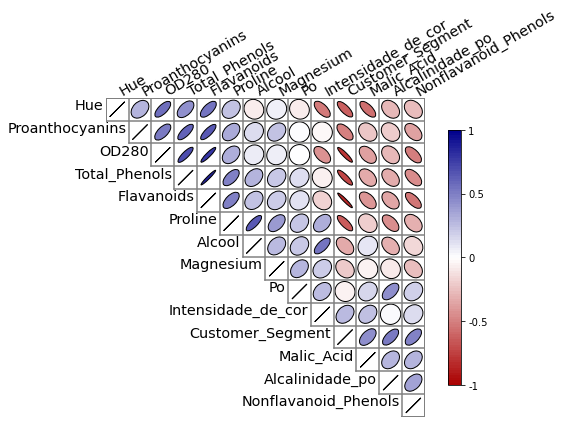

In [ ]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt
matriz_corr = dados.corr()

corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper='ellipse', fontsize='x-large')
fig = plt.gcf()
fig.set_size_inches(13,8)
plt.show()

In [ ]:
dados_v1 = dados

#Pegando os nomes das colunas (atributos)
atributos = dados_v1.columns

In [ ]:
dados_v1.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


## Normalizando todos os atributos para variarem entre 0 e 1

In [ ]:
for atributo in atributos:
  dados_v1[atributo] = (dados_v1[atributo]-min(dados_v1[atributo]))/(max(dados_v1[atributo])-min(dados_v1[atributo]))

In [ ]:
dados.head(5)

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [ ]:
dados.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalizando os dados com uma biblioteca do sklearn

In [ ]:
dados = pd.read_csv(uri)
dados = dados.rename(columns = {'Alcool': 'Alcool',
                          'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intendidade_de_cor'
                          })

colunas = dados.columns

from sklearn import preprocessing

# Transformando os dados
min_max_scaler = preprocessing.MinMaxScaler()
np_dados = min_max_scaler.fit_transform(dados)
dados = pd.DataFrame(np_dados, columns = atributos)
dados.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Revertendo a normalização dos dados

In [ ]:
np_dados = min_max_scaler.inverse_transform(dados)
dados = pd.DataFrame(np_dados, columns = atributos)


In [ ]:
dados.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


# Utilizando técnica KMEANS

In [ ]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters=4)

In [ ]:
agrupador.fit(dados)

KMeans(n_clusters=4)

In [ ]:
labels = agrupador.labels_
print(labels)

[3 3 1 1 0 1 1 1 3 3 1 1 1 3 1 1 1 3 1 0 0 0 3 3 0 0 1 1 3 3 1 1 3 1 3 3 3
 3 3 0 0 3 3 0 3 3 3 3 3 1 3 1 1 1 3 3 3 1 1 2 0 2 0 2 2 0 2 2 0 0 3 2 2 3
 3 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 3 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 2 2 0 0 0 0 2 0 0 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 3 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]


In [ ]:
agrupador.fit(dados)
labels = agrupador.labels_
print(labels)

[3 3 3 0 1 0 0 0 3 3 0 0 0 3 0 0 0 3 0 1 1 1 3 3 1 1 0 0 3 3 0 0 3 0 3 3 3
 3 3 1 1 3 3 1 3 3 3 3 3 0 3 0 3 0 3 3 3 0 0 2 1 2 1 2 2 1 2 2 1 1 3 2 2 3
 3 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 2 3 1 2 1 2 1 2 2 2 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1
 1 2 2 2 2 1 1 1 2 3 1 1 2 1 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados['Intensidade_de_cor'], y=dados['Alcool'], mode='markers', marker=dict(color=agrupador.labels_.astype(np.float)), text=labels))
fig.show()

In [ ]:
agrupador = KMeans(n_clusters=3)
agrupador.fit(dados)
labels = agrupador.labels_
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados['Intensidade_de_cor'], y=dados['Alcool'], mode='markers', marker=dict(color=agrupador.labels_.astype(np.float)), text=labels))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dados['Intensidade_de_cor'], y=dados['Alcool'], z=dados['Proline'], mode='markers', 
                           marker=dict(color=agrupador.labels_.astype(np.float)), text=labels))
fig.show()

In [ ]:
fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))
fig.show()

In [ ]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,12.516667,2.494203,2.288551,20.823188,92.347826,2.070725,1.758406,0.390145,1.451884,4.086957,0.941159,2.490725,458.231884,2.275362
1,13.804468,1.883404,2.426170,17.023404,105.510638,2.867234,3.014255,0.285319,1.910426,5.702553,1.078298,3.114043,1195.148936,1.021277
2,12.929839,2.504032,2.408065,19.890323,103.596774,2.111129,1.584032,0.388387,1.503387,5.650323,0.883968,2.365484,728.338710,2.258065


In [ ]:
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'], y=centros['Alcool'], z=centros['Proline'], mode='markers', 
                           marker=dict(color='red'), text=[0,1,2]))
fig.show()

# Utilizando o algoritmo de agrupamento espacial de aplicativos com ruído baseado em densidade (DBSCAN)

In [ ]:
from sklearn.cluster import DBSCAN
agrupador  = DBSCAN(eps=1.31,min_samples=15, metric='manhattan')
agrupador.fit(dados_v1)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

# Utilizando o algoritmo MeanShift

## Importando as bibliotecas

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
agrupador = MeanShift()
agrupador.fit(dados)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(dados, quantile = 0.1)
agrupador = MeanShift()
agrupador.fit(dados)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0])

In [ ]:
agrupador = KMeans(n_clusters = 5)
agrupador.fit(dados)
labels = agrupador.labels_
labels

array([4, 4, 4, 1, 2, 1, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 2, 2, 2,
       4, 4, 2, 2, 4, 1, 2, 4, 1, 1, 4, 1, 4, 2, 2, 4, 4, 2, 2, 4, 4, 0,
       2, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 2, 0, 2, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 2, 2, 3, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 2, 2,
       2, 0], dtype=int32)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = dados['Intensidade_de_cor'], y = dados['Alcool'], z = dados['Proline'], mode='markers', 
                           marker = dict(color = labels.astype(np.float)), text = labels))
fig.show()